<a href="https://colab.research.google.com/github/eve-okorie16/sync-ml/blob/main/face_mask_training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing relevant libraries

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


9406464/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[

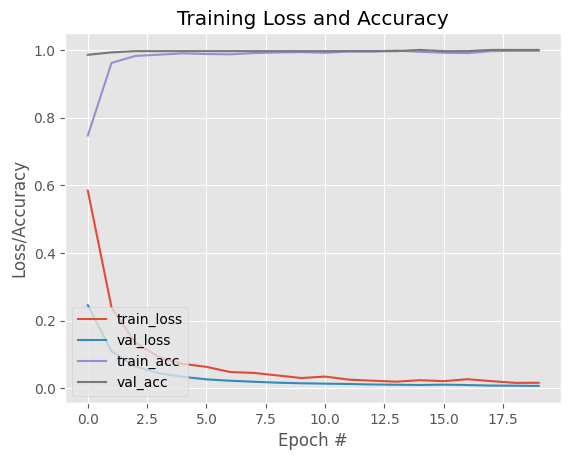

In [3]:
from IPython.lib.display import join
from IPython.utils import path
imagePaths = list(paths.list_images('/content/drive/MyDrive/dataset'))
INIT_LR = 1e-4
EPOCHs = 20
BS = 32

data = []
labels = []

#looping over all image paths with a for loop
for imagePath in imagePaths:
  label = imagePath.split(os.path.sep)[-2]
  image = load_img(imagePath, target_size = (224,224))
  image = img_to_array(image)
  image = preprocess_input(image)

  data.append(image)
  labels.append(label)
data = np.array(data, dtype= "float32")
labels = np.array(labels)

#using one hot encoding , data is split inti trainin and testing sets and augmentation is carried out
label_binarizer = LabelBinarizer()

labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)
#divide data into training and testing, 80% and 20respectively
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)
#data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

# customize the pretrained model
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_shape=(224,224,3))
#construct head of model that will be at the top
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
#placing the headModel on top of the baseModel
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
 layer.trainable = False

 #compiling the model and training on augmented data

 print("[INFO] compiling model...")
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=opt, metrics=["accuracy"])
print("[INFO] training head...")

INIT_LR = 1e-4
EPOCHS = 20
BS = 32
History = model.fit(aug.flow(X_train, Y_train, batch_size=BS), steps_per_epoch=len(X_train)//BS, validation_data=(X_test, Y_test),validation_steps=len(X_test)//BS, epochs=EPOCHS)
#evalaute the model. predict the testing set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true =np.argmax(Y_test, axis=1)

class_labels = label_binarizer.classes_
print(classification_report(y_true, y_pred, target_names=class_labels))

#save the model
model.save("mask_detector.model", save_format="h5")

#plot the loss and accuracy training

N = EPOCHs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), History.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), History.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), History.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), History.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")












training the model